#Biodata :

1.   Nama   : Muhammad Athaillah
2.   Email  : mathaillah96@gmail.com






In [75]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2021-04-18 22:07:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.71MB/s    in 3m 49s  

2021-04-18 22:10:56 (1.35 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [76]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'


In [77]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'scissors', 'rock', 'paper']

In [78]:
pip install split-folders

In [79]:
import splitfolders  # or import split_folders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/hasil_split", seed=1337, ratio=(.6, .4))
data_split = '/tmp/rockpaperscissors/hasil_split'

Copying files: 2188 files [00:00, 4089.72 files/s]


In [80]:
train_dir = os.path.join(data_split, 'train')
validation_dir = os.path.join(data_split, 'val')

In [81]:
os.listdir(data_split)

['train', 'val']

In [82]:
train_datagen = ImageDataGenerator(
                    validation_split=0.6,
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    validation_split=0.4,
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [83]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [86]:
os.listdir(validation_dir)


['scissors', 'rock', 'paper']

In [87]:
os.listdir(train_dir)

['scissors', 'rock', 'paper']

In [88]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax') #softmax = multiclass. sigmoid = 2 class. Dense = 1 itu berarti 1 class. yang di prediksi 3 class Jadi Dense(3, softmax)

])
 

In [101]:
model.compile(loss='CategoricalCrossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [102]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)


Epoch 1/25
25/25 - 8s - loss: 0.4829 - accuracy: 0.8500 - val_loss: 0.7444 - val_accuracy: 0.7000
Epoch 2/25
25/25 - 8s - loss: 0.3907 - accuracy: 0.8600 - val_loss: 0.3839 - val_accuracy: 0.8500
Epoch 3/25
25/25 - 8s - loss: 0.3457 - accuracy: 0.8900 - val_loss: 0.1278 - val_accuracy: 1.0000
Epoch 4/25
25/25 - 8s - loss: 0.1651 - accuracy: 0.9700 - val_loss: 0.1210 - val_accuracy: 0.9500
Epoch 5/25
25/25 - 8s - loss: 0.2263 - accuracy: 0.9500 - val_loss: 0.6150 - val_accuracy: 0.8500
Epoch 6/25
25/25 - 8s - loss: 0.1961 - accuracy: 0.9200 - val_loss: 0.6008 - val_accuracy: 0.8500
Epoch 7/25
25/25 - 8s - loss: 0.3264 - accuracy: 0.9100 - val_loss: 0.2152 - val_accuracy: 0.9500
Epoch 8/25
25/25 - 8s - loss: 0.2039 - accuracy: 0.9300 - val_loss: 0.3181 - val_accuracy: 0.8500
Epoch 9/25
25/25 - 8s - loss: 0.1931 - accuracy: 0.9200 - val_loss: 0.4890 - val_accuracy: 0.8500
Epoch 10/25
25/25 - 8s - loss: 0.1999 - accuracy: 0.9300 - val_loss: 0.3030 - val_accuracy: 0.8500
Epoch 11/25
25/25 -

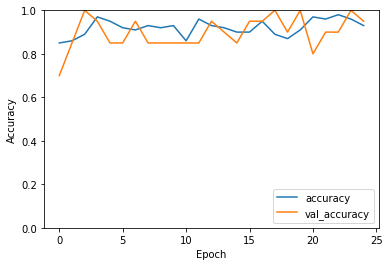

In [103]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


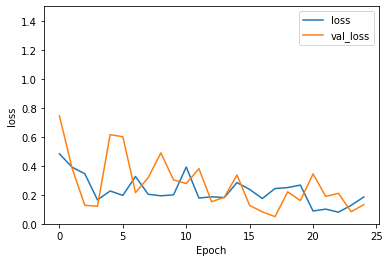

In [104]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1.5])
plt.legend(loc='best')

Saving download (2).jpg to download (2).jpg
Name of file :  download (2).jpg
clasess: [[0. 1. 0.]]
rock


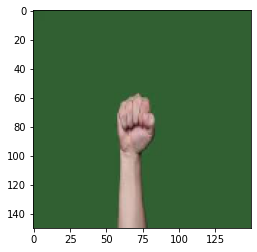

In [114]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload() # input gambar
  
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print('Name of file : ',fn)
  print('clasess:' ,classes)
  if classes[0][0] == 1:
    print('paper')
  if classes[0][1] == 1:
    print('rock')
  if classes[0][2] == 1:
    print('scissors')
